This is obsolete.  Use JRR_Code/read_JWST_bkg.py

In [43]:
import pandas 
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%pylab inline
sns.set(font_scale=2)
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [44]:
wdir = "/Volumes/Apps_and_Docs/MISSIONS/JWST/Zody_bathtubs/"
infile = "gooddays_worked_31mar2017.txt"
whichwaves = [1.0, 2.0, 5.0, 10.1]
whichthresh = [1.05, 1.1, 1.3, 1.5, 2.0]
df2 = pandas.read_csv(wdir + infile, comment="#")
x1 = 90; x2=366; y1=0; y2=1.05
wavelength_desired = whichwaves[-2]
thresh = whichthresh[1]
lab1 = "Ndays in FOR"
lab2 = "fraction of days w " + str(wavelength_desired) + " um bkg <" + str(thresh) + " of minimum"
goodcol =  "Good"+str(wavelength_desired)+ "_" + str(thresh)
print wavelength_desired, thresh, goodcol
df2['good_frac'] = df2[goodcol] / df2['Nday']

5.0 1.1 Good5.0_1.1


(0, 1.05)

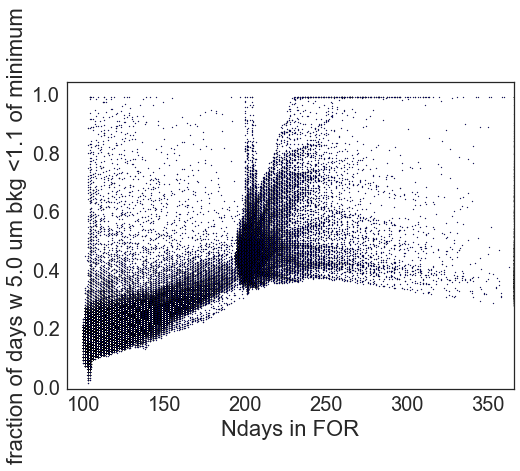

In [45]:
plt.scatter(df2['Nday'], df2['good_frac'], s=1)
plt.xlabel(lab1)
plt.ylabel(lab2)
plt.xlim(x1,x2)
plt.ylim(y1,y2)

In [46]:
#newcmap = sns.choose_cubehelix_palette(as_cmap=True)

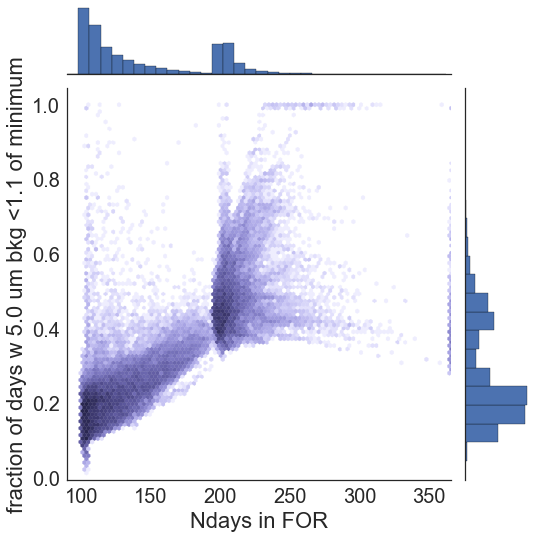

In [49]:
# Density plot, with histograms on margins.  From NB example,
cmap = sns.cubehelix_palette(n_colors=10,  start=0, rot=0.0, gamma=2.0, hue=1, light=1, dark=0.4, reverse=False, as_cmap=True)
g = sns.JointGrid(df2['Nday'], df2['good_frac'], size=8)
g.set_axis_labels(lab1, lab2)
g.ax_marg_x.hist(df2['Nday'], bins=np.arange(x1, x2, 8))
g.ax_marg_y.hist(df2['good_frac'], bins=np.arange(y1,y2,0.05), orientation="horizontal")
g.plot_joint(plt.hexbin, gridsize=100, extent=[x1, x2, y1, y2], cmap=cmap, mincnt=1, bins='log')